In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load Data

In [2]:
file_path = "Diagonalization/diagonalizaton_results_"


# Diagonalization algorithm
df_diag_mixed = pd.read_csv(file_path + "Mixed_Diag.csv", )
df_diag_PVs = pd.read_csv(file_path + "Fixed_PVs_Diag.csv")
df_diag_EVs = pd.read_csv(file_path + "Fixed_EVs_Diag.csv")

# AHE algorithm
df_ahe_mixed = pd.read_csv(file_path + "Mixed_AHE.csv")
df_ahe_PVs = pd.read_csv(file_path + "Fixed_PVs_AHE.csv")
df_ahe_EVs = pd.read_csv(file_path + "Fixed_EVs_AHE.csv")

In [3]:
# add all dataframes 
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, df_ahe_mixed, df_ahe_PVs, df_ahe_EVs]

# Drop first iteration values as it run by random values
for df in df_all:
    df.drop(df[df['Iteration']==0].index,inplace=True)
    df.drop(columns="Unnamed: 0", inplace=True)

In [4]:
# Numeric all column Values
df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, df_ahe_mixed,df_ahe_PVs,df_ahe_EVs]

for df in df_all:
    for col in df:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        

In [5]:
# Offers columns list
offers_cols = ['offer_0'+str(x) for x in range(1,10)]

# Deamnds columns list
bids_cols = ['bids_0'+str(x) for x in range(1,10)]

# Create Xticks for DAs
DA_xtick = ['DA'+str(x) for x in range(1,10)]

# Dictionary to map offers and bids to DA
offers_dic=dict()

for x in range(1,10):
    offers_dic[offers_cols[x-1]] ='DA'+str(x)
    
# Dictionary for demand bids
bids_dic = dict()

for x in range(1,10):
    bids_dic[bids_cols[x-1]] = 'DA'+str(x)
    
# List as all dataframes
scenario_df_all =['Mixed', 'Fixed_PVs', 'Fixed_EVs', 'Mixed', 'Fixed_PVs', 'Fixed_EVs']

# Algorithms in df_all
algo_df_all = ['Diag', 'Diag', 'Diag', 'AHE', 'AHE', 'AHE']

# 2) Compare Dataframe Values

### 2.1) Average Offer Values BoxPlot

In [15]:
value =[]
algorithm =[]
das =[]
scenario =[]

for x in range(len(df_all)):
    df = df_all[x]
    algo = algo_df_all[x]
    scen = scenario_df_all [x]
    for val, idx in zip(df[offers_cols].mean(), df[offers_cols].mean().index):
        value.append(val)
        algorithm.append(algo)
        scenario.append(scen)
        das.append(offers_dic[idx])

# Create Dataframe containing Average Values
df_temp = pd.DataFrame({'Average':value, 'Algorithm':algorithm, 'DA':das, 'Scenario':scenario})

[]

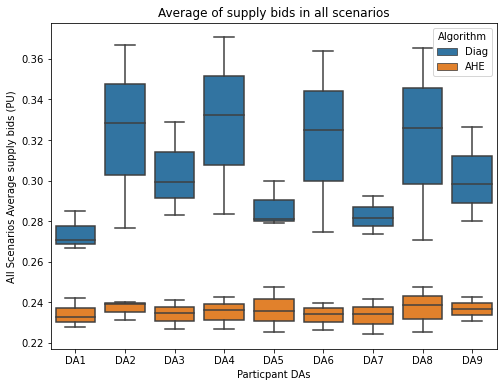

In [22]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.boxplot(x='DA', y='Average', hue='Algorithm', data=df_temp, dodge=False, ax=ax) #x='DA', dodge=False,
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of supply bids in all scenarios', fontsize = 12)
ax.set_xlabel('Particpant DAs')
ax.set_ylabel('All Scenarios Average supply bids (PU)')

ax.plot()

### 2.2) Average Bids Values plot BoxPlot

In [18]:
value =[]
algorithm =[]
das =[]
scenario =[]

for x in range(len(df_all)):
    df = df_all[x]
    algo = algo_df_all[x]
    scen = scenario_df_all [x]
    for val, idx in zip(df[bids_cols].mean(), df[bids_cols].mean().index):
        value.append(val)
        algorithm.append(algo)
        scenario.append(scen)
        das.append(bids_dic[idx])

# Create Dataframe containing Average Values
df_temp = pd.DataFrame({'Average':value, 'Algorithm':algorithm, 'DA':das, 'Scenario':scenario})

[]

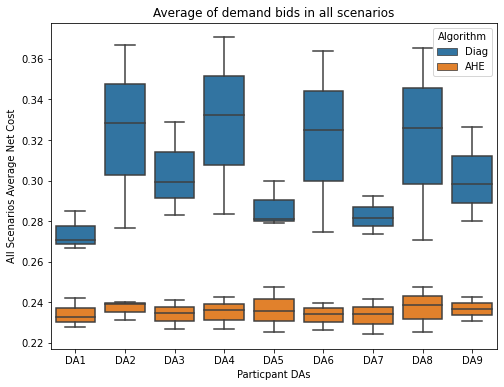

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.boxplot(x='DA', y='Average', hue='Algorithm', data=df_temp, dodge=False, ax=ax) #x='DA',
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of demand bids in all scenarios', fontsize = 12)
ax.set_xlabel('Particpant DAs')
ax.set_ylabel('All Scenarios Average')

ax.plot()

### 2.3) Average demand bids based on algorithm and scenario

[]

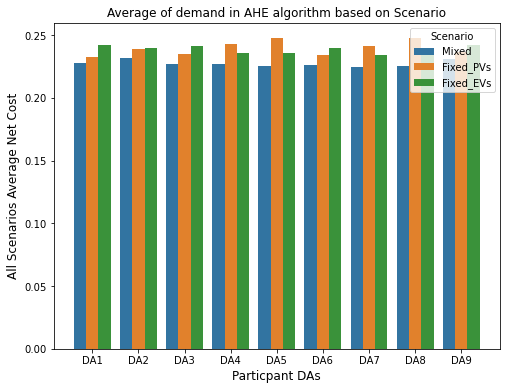

In [10]:
#df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, df_ahe_mixed, df_ahe_PVs, df_ahe_EVs]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(x='DA', y='Average', hue='Scenario', data=df_temp[df_temp.Algorithm=='AHE'], ax=ax) #x='DA',
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of demand in AHE algorithm based on Scenario', fontsize = 12)
ax.set_xlabel('Particpant DAs', fontsize = 12)
ax.set_ylabel('All Scenarios Average Net Cost', fontsize = 12)

ax.plot()

#### Find similar as above for Diagonalization

[]

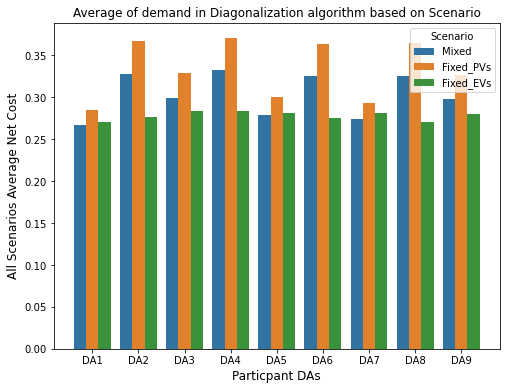

In [11]:
#df_all = [df_diag_mixed, df_diag_PVs, df_diag_EVs, df_ahe_mixed, df_ahe_PVs, df_ahe_EVs]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(x='DA', y='Average', hue='Scenario', data=df_temp[df_temp.Algorithm=='Diag'], ax=ax) #x='DA',
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of demand in Diagonalization algorithm based on Scenario', fontsize = 12)
ax.set_xlabel('Particpant DAs', fontsize = 12)
ax.set_ylabel('All Scenarios Average Net Cost', fontsize = 12)

ax.plot()

### 2.4) Average Supply bid based on scenario and algorithm

In [12]:
# Again find average offers 
value =[]
algorithm =[]
das =[]
scenario =[]

for x in range(len(df_all)):
    df = df_all[x]
    algo = algo_df_all[x]
    scen = scenario_df_all [x]
    for val, idx in zip(df[offers_cols].mean(), df[offers_cols].mean().index):
        value.append(val)
        algorithm.append(algo)
        scenario.append(scen)
        das.append(offers_dic[idx])

# Create Dataframe containing Average Values
df_temp = pd.DataFrame({'Average':value, 'Algorithm':algorithm, 'DA':das, 'Scenario':scenario})

[]

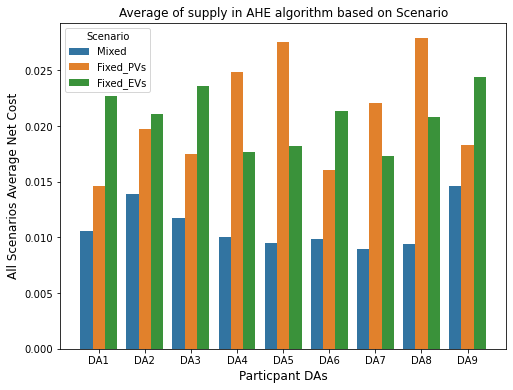

In [13]:
# Find it for AHE algorithm
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(x='DA', y='Average', hue='Scenario', data=df_temp[df_temp.Algorithm=='AHE'], ax=ax) #x='DA',
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of supply in AHE algorithm based on Scenario', fontsize = 12)
ax.set_xlabel('Particpant DAs', fontsize = 12)
ax.set_ylabel('All Scenarios Average Net Cost', fontsize = 12)

ax.plot()

[]

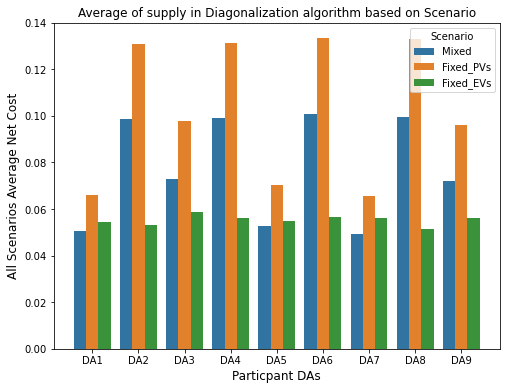

In [14]:
# Find it for AHE algorithm
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(x='DA', y='Average', hue='Scenario', data=df_temp[df_temp.Algorithm=='Diag'], ax=ax) #x='DA',
# sns.swarmplot(x="DA", y="Average", data=df_temp, color=".1", ax=ax)


ax.set_title('Average of supply in Diagonalization algorithm based on Scenario', fontsize = 12)
ax.set_xlabel('Particpant DAs', fontsize = 12)
ax.set_ylabel('All Scenarios Average Net Cost', fontsize = 12)

ax.plot()